### **Problema**
Una agencia inmobiliaria desea mejorar sus estrategias de venta y toma de decisiones al estimar los precios de las viviendas en una ciudad específica. Esta agencia cuenta con un conjunto de datos históricos que incluyen características de las propiedades (como número de habitaciones, baños, ubicación, antigüedad, entre otros) y sus precios de venta.

### **Objetivo**
El objetivo es construir un modelo de predicción que, a partir de las características de una casa, pueda estimar de manera precisa su precio en el mercado. Este modelo ayudará a la agencia a ofrecer estimaciones rápidas a sus clientes y a definir precios más competitivos basados en las características de cada propiedad.

### **Datos disponibles**
La agencia cuenta con un conjunto de datos que incluye las siguientes variables:

### **Superficie de la casa (en metros cuadrados)**

* id: Unique identifier for each property 
* date: Date of property listing 
* price: Property price in currency
* bedrooms: Number of bedrooms 
* bathrooms: Number of bathrooms
* sqft_living: Living area size in square feet
* sqft_lot: Total lot size in square feet
* floors: Number of floors
* waterfront: Indicates if property has waterfront view (0 for no, 1 for yes).
* view: Quality level of property view (0 to 4)
* condition: Overall condition rating (1 to 5)
* grade: Overall grade rating (1 to 13)
* sqft_above: Living area above ground level in square feet
* sqft_basement: Basement area in square feet
* yr_built: Year property was built
* yr_renovated: Year property was last renovated (0 if never)
* zipcode: Property location zip code
* lat: Latitude coordinate of property location
* long: Longitude coordinate of property location
* sqft_living15: Living area size of 15 nearest properties in square feet
* sqft_lot15: Lot size of 15 nearest properties in square feet

### **Desafío:**
Se necesita desarrollar un modelo de aprendizaje automático que, utilizando estos datos, permita predecir el precio de venta de una casa con base en sus características. Además, el modelo debe ser lo suficientemente robusto como para ajustarse a diferentes zonas de la ciudad y ser fácil de actualizar con nuevos datos.

### **Criterios de éxito**

La precisión del modelo en los datos de prueba debe estar por encima de un umbral de error específico.
El modelo debe ser capaz de interpretar qué variables afectan más al precio de venta.
Se debe garantizar que el modelo se pueda adaptar a nuevas zonas de la ciudad en caso de que se disponga de nuevos datos en el futuro.

### **Fuente:** https://www.kaggle.com/datasets/sukhmandeepsinghbrar/housing-price-dataset?select=Housing.csv

### **Tipo de problema:** Regresión


### **Liberías**

In [93]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats


### **Datos**

In [94]:
df_housing = pd.read_csv("./data/housing.csv")

### **División en Train y Test**

**Variable Target:** Price

In [95]:
target = "price"

In [96]:
X_train, X_test, y_train, y_test = train_test_split(df_housing.drop(target, axis=1),
                                                    df_housing[target],
                                                    test_size=0.2,
                                                    random_state=42)


In [97]:
y_train = pd.DataFrame(y_train)

In [98]:
len(X_train)

17290

In [99]:
len(X_test)

4323

### **Exploración de los datos**

In [100]:
X_train.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
6325,5467910190,20140527T000000,3,1.75,1780,13095,1.0,0,0,4,9,1780,0,1983,0,98042,47.3670,-122.152,2750,13095
13473,9331800580,20150310T000000,2,1.00,1000,3700,1.0,0,0,3,6,800,200,1929,0,98118,47.5520,-122.290,1270,5000
17614,2407000405,20150226T000000,3,1.00,1080,7486,1.5,0,0,3,6,990,90,1942,0,98146,47.4838,-122.335,1170,7800
16970,5466700290,20150108T000000,3,2.25,2090,7500,1.0,0,0,4,7,1280,810,1977,0,98031,47.3951,-122.172,1800,7350
20868,3026059361,20150417T000000,2,2.50,1741,1439,2.0,0,0,3,8,1446,295,2007,0,98034,47.7043,-122.209,2090,10454


In [101]:
X_train.columns #Tenemos un total de 20 columnas excluyendo el target, mismas que están descritas en la parte de descripción del problema de la parte de arriba

Index(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [102]:
X_train.info() #se observa de primeras que no hay nulos que necesiten tratamientos
                  #además se observa que de 20 variables, parece que solo 1 es tipo objeto y las demás númericas

<class 'pandas.core.frame.DataFrame'>
Index: 17290 entries, 6325 to 15795
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             17290 non-null  int64  
 1   date           17290 non-null  object 
 2   bedrooms       17290 non-null  int64  
 3   bathrooms      17290 non-null  float64
 4   sqft_living    17290 non-null  int64  
 5   sqft_lot       17290 non-null  int64  
 6   floors         17290 non-null  float64
 7   waterfront     17290 non-null  int64  
 8   view           17290 non-null  int64  
 9   condition      17290 non-null  int64  
 10  grade          17290 non-null  int64  
 11  sqft_above     17290 non-null  int64  
 12  sqft_basement  17290 non-null  int64  
 13  yr_built       17290 non-null  int64  
 14  yr_renovated   17290 non-null  int64  
 15  zipcode        17290 non-null  int64  
 16  lat            17290 non-null  float64
 17  long           17290 non-null  float64
 18  sqft_liv

In [103]:
def describe_df(df):

    # Crear un diccionario para almacenar la información
    resumen = {
        'Tipo de Dato': df.dtypes,
        '% Valores Nulos': df.isnull().mean() * 100,
        'Valores Únicos': df.nunique(),
        '% Cardinalidad': (df.nunique() / len(df)) * 100
    }
    
    # Crear un DataFrame a partir del diccionario
    resumen_df = pd.DataFrame(resumen)
    
    # Ajustar el formato de la salida (por ejemplo, redondear los porcentajes)
    resumen_df['% Valores Nulos'] = resumen_df['% Valores Nulos'].round(2)
    resumen_df['% Cardinalidad'] = resumen_df['% Cardinalidad'].round(2)
    
    return resumen_df.T

In [104]:
describe_df(X_train)

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
Tipo de Dato,int64,object,int64,float64,int64,int64,float64,int64,int64,int64,int64,int64,int64,int64,int64,int64,float64,float64,int64,int64
% Valores Nulos,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Valores Únicos,17178,368,12,29,923,8406,6,2,5,5,12,842,288,116,70,70,4846,724,710,7558
% Cardinalidad,99.35,2.13,0.07,0.17,5.34,48.62,0.03,0.01,0.03,0.03,0.07,4.87,1.67,0.67,0.4,0.4,28.03,4.19,4.11,43.71


In [105]:
def tipifica_variables(df, umbral_categoria=10, umbral_continua=0.90):

     # Asegúrate de que umbral_categoria es un entero
    try:
        umbral_categoria = int(umbral_categoria)
    except ValueError:
        print(f"Error: umbral_categoria debe ser un número, se recibió: {umbral_categoria}")
        return None

    # Inicializar una lista para almacenar el resultado
    sugerencias = []

    # Recorrer cada columna del DataFrame
    for col in df.columns:
        # Calcular la cardinalidad (número de valores únicos)
        cardinalidad = df[col].nunique()
        # Calcular el porcentaje de cardinalidad
        porcentaje_cardinalidad = (cardinalidad / len(df)) * 100
        
        # Determinar el tipo sugerido
        if cardinalidad == 2:
            tipo_sugerido = "Binaria"
        elif cardinalidad < umbral_categoria:
            tipo_sugerido = "Categórica"
        elif porcentaje_cardinalidad >= umbral_continua:
            tipo_sugerido = "Numerica Continua"
        else:
            tipo_sugerido = "Numerica Discreta"
        
        # Añadir la sugerencia a la lista
        sugerencias.append({
            'nombre_variable': col,
            'tipo_sugerido': tipo_sugerido
        })
    
    # Convertir la lista de sugerencias en un DataFrame
    resultado_df = pd.DataFrame(sugerencias)
    
    return resultado_df

In [106]:
tipifica_variables(X_train,10,0.90) 

,nombre_variable,tipo_sugerido
0,id,Numerica Continua
1,date,Numerica Continua
2,bedrooms,Numerica Discreta
3,bathrooms,Numerica Discreta
4,sqft_living,Numerica Continua
5,sqft_lot,Numerica Continua
6,floors,Categórica
7,waterfront,Binaria
8,view,Categórica
9,condition,Categórica


    umbral_categoria : int, opcional (por defecto 10)
        El umbral de cardinalidad. Si una columna tiene menos valores únicos que este
        umbral, se considera categórica. Si tiene más, se considera numérica.

    umbral_continua : float, opcional (por defecto 0.90)
        Umbral de porcentaje de cardinalidad sobre el tamaño del DataFrame. Si el
        porcentaje de valores únicos en la columna es superior o igual a este umbral
        y la cardinalidad supera el umbral de categorías, la variable se considera 
        "Numérica Continua". En caso contrario, se considera "Numérica Discreta".

In [107]:
X_train.describe()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.729000e+04,17290.000000,17290.000000,17290.000000,1.729000e+04,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000
mean,4.580770e+09,3.368074,2.113794,2073.894910,1.479895e+04,1.499161,0.007172,0.233025,3.407577,7.653846,1785.962175,287.932736,1971.108329,83.003412,98077.974378,47.560330,-122.214139,1982.904569,12725.059341
std,2.876748e+09,0.931439,0.766790,907.297963,3.883925e+04,0.542819,0.084385,0.761749,0.651698,1.170355,821.626290,438.727110,29.435603,398.503250,53.326084,0.138432,0.140498,681.232425,27525.258285
min,1.000102e+06,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.159300,-122.519000,399.000000,651.000000
25%,2.123042e+09,3.000000,1.500000,1430.000000,5.001250e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1951.000000,0.000000,98033.000000,47.472000,-122.329000,1480.000000,5083.000000
50%,3.905000e+09,3.000000,2.250000,1910.000000,7.600000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7615.000000
75%,7.305301e+09,4.000000,2.500000,2540.000000,1.060675e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2200.000000,550.000000,1997.000000,0.000000,98117.000000,47.678000,-122.125000,2360.000000,10046.000000
max,9.900000e+09,33.000000,8.000000,12050.000000,1.164794e+06,3.500000,1.000000,4.000000,5.000000,13.000000,8860.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


*Podemos ver que según la desviación estandár (std) nos dice que hay algunas de las variables con outliers potentes, por ejemplo, sqt_living, sqft_lot, grade, sqtf_above, sqft_basement, yr_built, yr_renovated, zipcode, sqft_living15 ysqft_lot15*

*Veo que hay outliers potentes en algunas variables (lo tendré que tener en cuenta si voy a estandarizar para hacer transformaciones primero)*

*Finalmente, veo que **floors** esta clasificada como Categórica, pero la clasificaría como Númerica Discreta y **grade** definitivamente es categoríca y no númerica*

## Target - Caso deseado de distribución normal

<Axes: xlabel='price', ylabel='Count'>

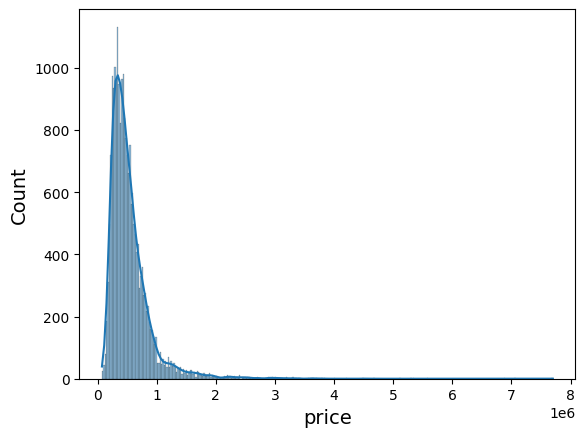

In [108]:
sns.histplot(x = target, data = df_housing, kde = True)

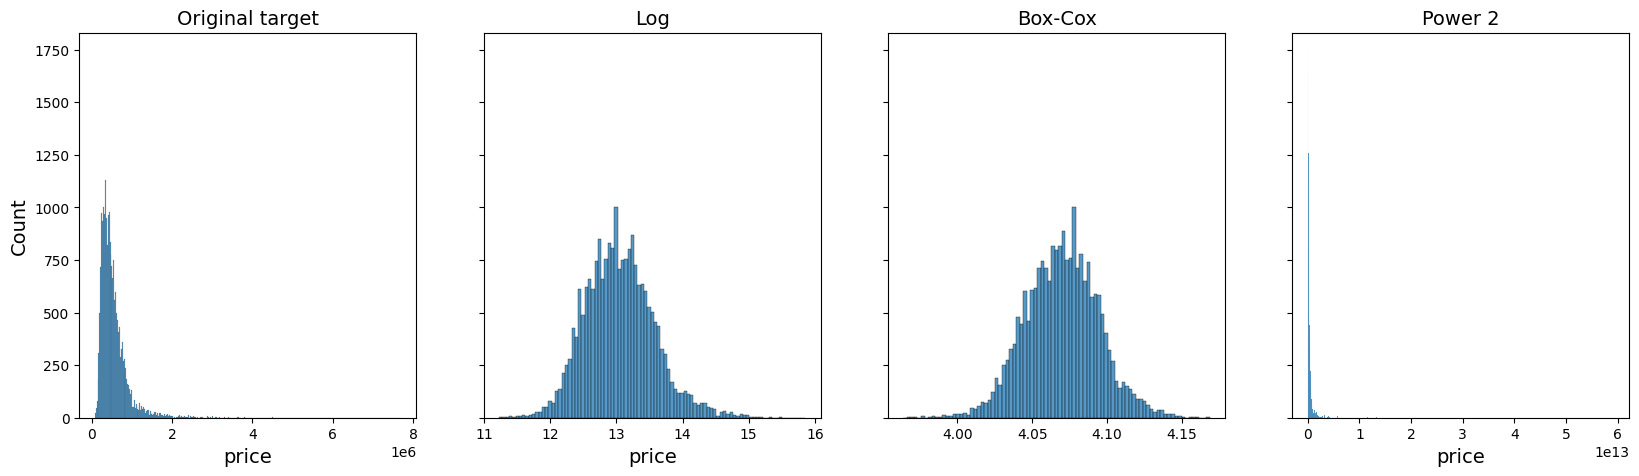

In [109]:
fig, axes = plt.subplots(1, 4, figsize=(20, 5), sharey=True)
df_housing_target = df_housing.price

# Original target
sns.histplot(df_housing_target, kde=False, ax=axes[0])
axes[0].set_title("Original target")

# Logaritmic
sns.histplot(np.log(df_housing_target),kde=False, ax=axes[1])
axes[1].set_title("Log")

# Box-cox
sns.histplot(stats.boxcox(df_housing_target)[0],kde=False, ax=axes[2])
axes[2].set_title("Box-Cox");

# Power 2
sns.histplot(np.power(df_housing_target, 2),kde=False, ax=axes[3])
axes[3].set_title("Power 2");

## Revisión de las variables:

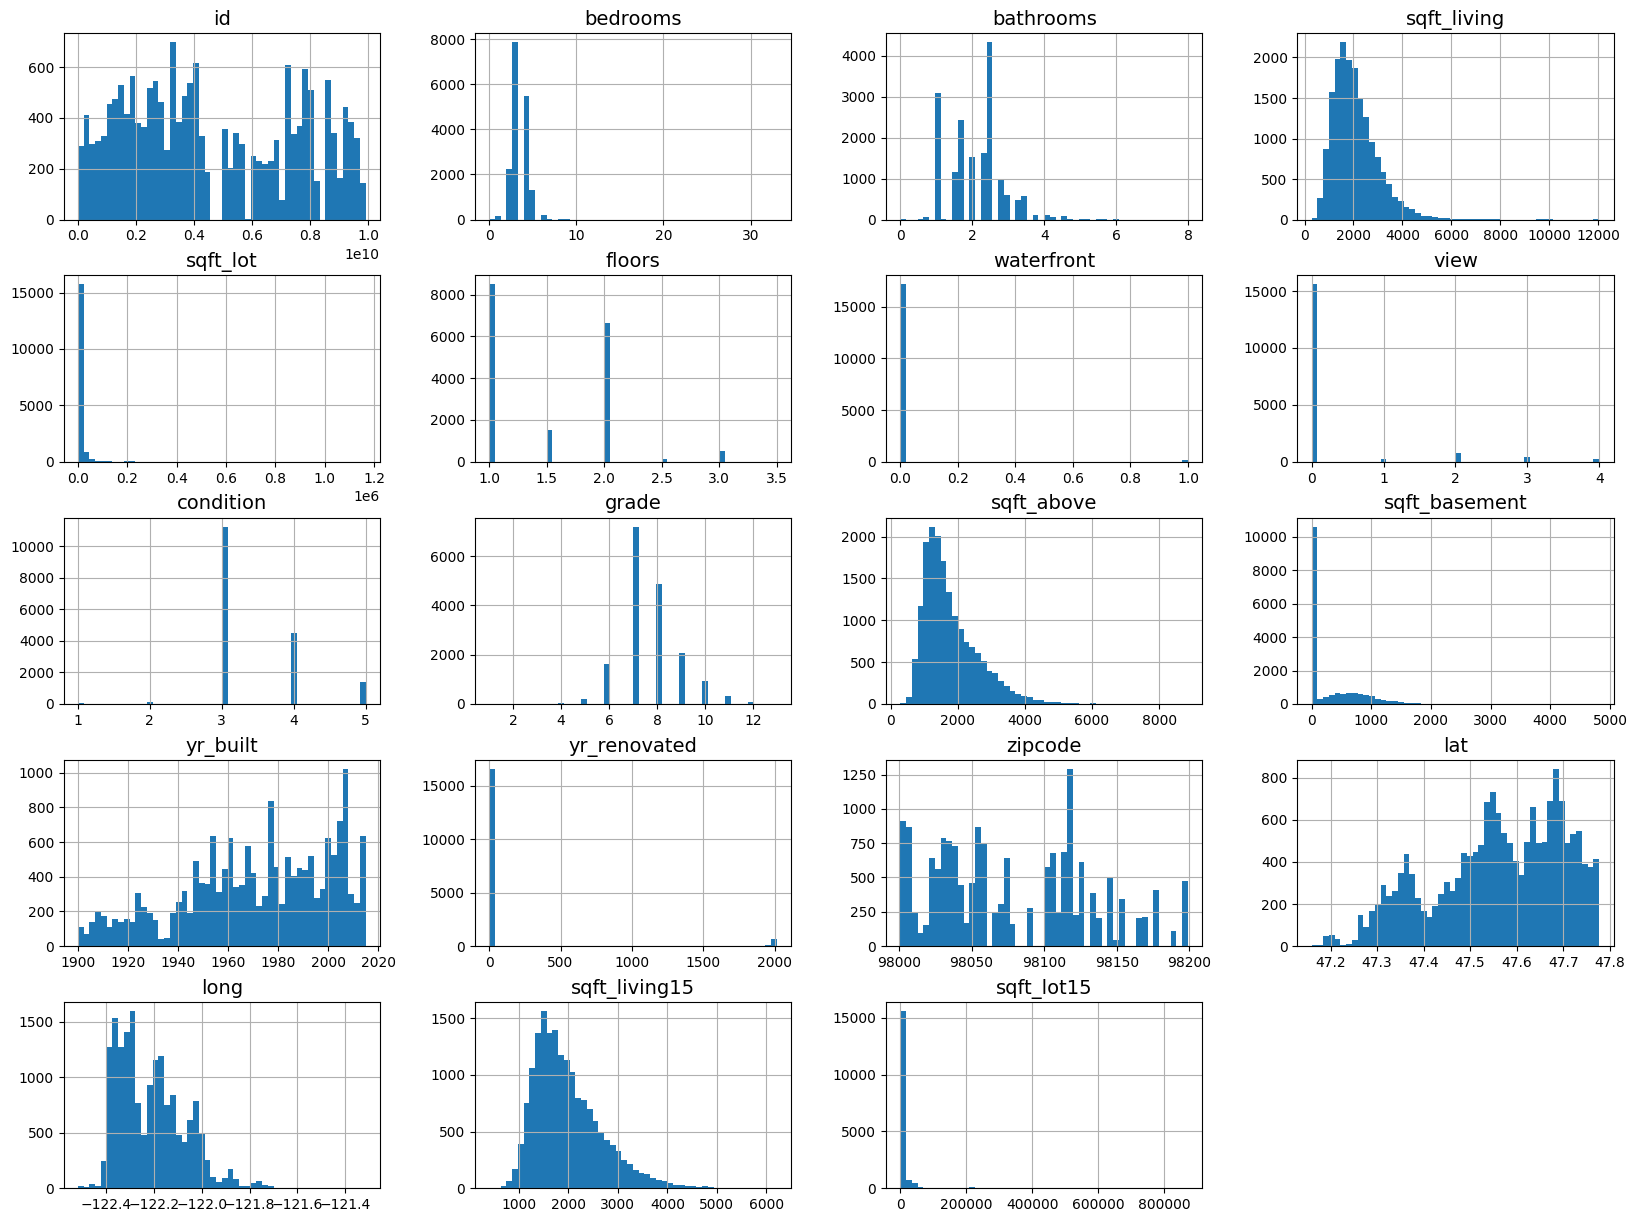

In [110]:
# Código extra para los tamaños de las fuentes y los "ticks" de los ejes
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

X_train.hist(bins=50, figsize=(20, 15)) # La forma de generar histogramas de una sola vez para las variables numéricas de un dataset
plt.show()

In [111]:
y_train["price_cat"] = pd.cut(y_train["price"], # Se convierte "price" a categórica
                              bins=[0.,200000,400000,500000,800000,1000000.,np.inf],
                              labels=[1,2,3,4,5,6]
                              )

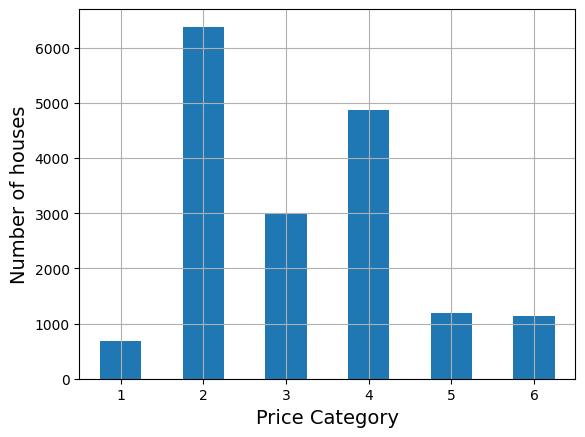

In [112]:
y_train["price_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Price Category")
plt.ylabel("Number of houses")
plt.show()

In [113]:
y_train["price_cat"].value_counts()

price_cat
2    6379
4    4872
3    3009
5    1196
6    1145
1     689
Name: count, dtype: int64

In [114]:
y_train.drop("price", axis=1, inplace=True)



In [116]:
y_train.columns

Index(['price_cat'], dtype='object')

## Estratificado

In [119]:
df_housing["price_cat"] = pd.cut(df_housing["price"], # Se convierte "price" a categórica
                              bins=[0.,200000,400000,500000,800000,1000000.,np.inf],
                              labels=[1,2,3,4,5,6]
                              )

In [134]:
target = "price_cat"

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_housing.drop(target, axis=1), #hacemos que nuestro split de train y test tenga la misma proporción de valores categóricos de la variable "price_cat"
                                                    df_housing[target],
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=df_housing["price_cat"])

In [147]:
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)

In [141]:
y_train.price_cat.value_counts(True)

price_cat
2    0.370040
4    0.282591
3    0.172180
5    0.068479
6    0.067785
1    0.038924
Name: proportion, dtype: float64

In [149]:
y_test.price_cat.value_counts(True)

price_cat
2    0.370113
4    0.282674
3    0.172103
5    0.068471
6    0.067777
1    0.038862
Name: proportion, dtype: float64